In [1]:
from accelerator import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lat = Lattice([Drift(1)])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

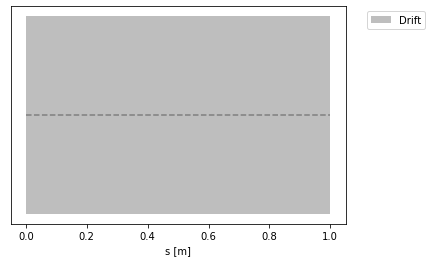

In [3]:
lat.plot()

In [4]:
lat._transport([1, 0, 1])

(array([1., 1.]), array([0., 0.]), array([1., 1.]), array([0, 1]))

In [5]:
drift_l = 5  # m
focal_length = 10  # meters

FODO_cell = [QuadrupoleThin(focal_length), Drift(drift_l), QuadrupoleThin(-focal_length), Drift(drift_l)]
fodo = Lattice(FODO_cell)
fodo

Lattice([QuadrupoleThin(f=10, name='quadrupole_thin_0'), Drift(l=5, name='drift_1'), QuadrupoleThin(f=-10, name='quadrupole_thin_1'), Drift(l=5, name='drift_2')])

In [6]:
n_fodo = 8
n_dipole = n_fodo # one dipole after each fodo
curve_perimeter = 120  # m
dip_theta = 2 * np.pi / n_dipole
dip_rho = curve_perimeter / (n_dipole * dip_theta)
drift_l = 10

In [7]:
dip = Dipole(dip_rho, dip_theta)

In [8]:
sequence = (FODO_cell + [dip, Drift(drift_l)]) * n_fodo
lattice = Lattice(sequence)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

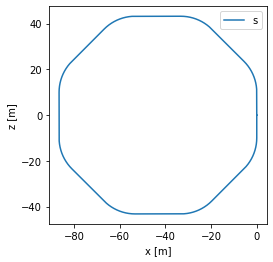

In [9]:
lattice.plot.top_down()

In [10]:
lattice.m_h.dispersion_solution

array([[12.73888596],
       [ 0.34517306],
       [ 1.        ]])

In [13]:
d, d_prime, dp, s = lattice.transport(phasespace=lattice.m_h.dispersion_solution)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

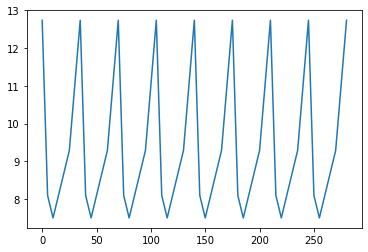

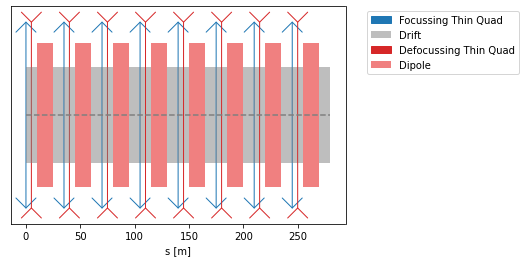

In [14]:
plt.plot(s, d)
lattice.plot()